 # K-means clustering: practical example

Mental health is an important aspect of the process of individual adaptation and development. Well-being is a positive mental health indicators that can be defined as an effect of the cognitive and emotional assessment of one’s own life,
consisting of a high level of fulfilment in multiple areas.

Another significant role in determining one’s mental health is resilience. Resilience might be seen as a personality trait—a positive, distinct feature of an individual that mitigates the negative effects of stress and minimises episodes of depression . Resilience has also been conceptualised as a process that encompasses positive adaptation within the context of adversity.

The aim of this project is to cluster the participants by using the `K-means algorithm`.

We utilized a preexisting dataset provided by Konaszewski et al. (Konaszewski K, Niesiobędzka M, Surzykiewicz J. Resilience and mental health among juveniles: role of strategies for coping with stress. Health Qual Life Outcomes. 2021 Feb 18;19(1):58) https://doi.org/10.3886/E120001V1. They investigate the direct and indirect role of resilience in shaping the mental health of juveniles. The dataset includes `resilience`, `well-being` and 14 `coping strategies`.

In [6]:
# Importing the libraries  
import numpy as np 
import pandas as pd  
import pyreadstat
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

In [2]:
df, meta=pyreadstat.read_sav('konzas2.sav')

In [3]:
df=df.dropna()

In [4]:
df.head(3)

,wb1,wb2,wb3,wb4,wb5,wb6,wb7,wb8,wb9,wb10,...,Behavioral_disengagement,Venting,Positive_reframing,Planning,Humor,Acceptance,Religion,Self_blame,res,well
0,2.0,2.0,3.0,3.0,3.0,2.0,3.0,4.0,2.0,3.0,...,2.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,62.0,42.0
1,4.0,5.0,4.0,5.0,4.0,3.0,4.0,4.0,4.0,3.0,...,3.0,5.0,3.0,1.0,3.0,4.0,4.0,3.0,80.0,56.0
2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,2.0,3.0,3.0,1.0,4.0,2.0,2.0,68.0,44.0


In [5]:
X = df.loc[:, ['res','well']]

<Axes: xlabel='res', ylabel='well'>

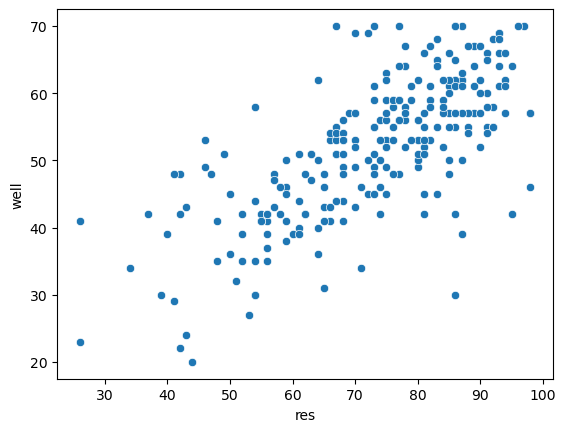

In [22]:
sns.scatterplot(x=X['res'],y=X['well'],palette='tab10')

Text(0, 0.5, 'Inertia')

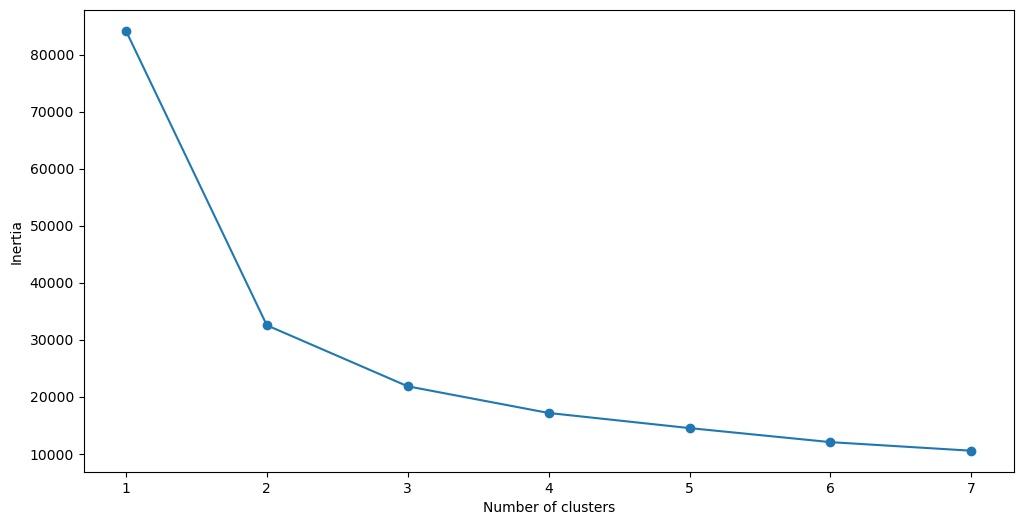

In [8]:
# Elbow method

SSE = []

for cluster in range(1,8):
    kmeans = KMeans( n_clusters = cluster, init='k-means++')
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them

frame = pd.DataFrame({'Cluster':range(1,8), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

<div class="alert alert-block alert-info">
<b></b> 

The point on the plot where the Inertia starts to decrease at a slower rate can be considered the elbow of the plot. The corresponding value of k at this point is considered the optimal number of clusters. Here, n=2 or 3 clusters could be suitable choice.
</div>

In [23]:
kmeans = KMeans( n_clusters = 3, init='k-means++')
kmeans.fit(X)


KMeans(n_clusters=3)

In [24]:
kmeans.cluster_centers_

array([[86.88172043, 60.86021505],
       [51.68852459, 39.60655738],
       [72.78787879, 51.18181818]])

In [25]:
kmeans.labels_

array([1, 0, 2, 2, 1, 0, 0, 2, 2, 0, 0, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 0, 0, 2, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0,
       0, 2, 1, 1, 2, 0, 2, 2, 1, 1, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 1,
       1, 2, 0, 2, 1, 0, 2, 0, 0, 1, 2, 2, 0, 1, 1, 0, 2, 1, 1, 2, 1, 2,
       0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 2, 2, 0,
       2, 2, 1, 0, 1, 1, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2,
       1, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 1, 2,
       1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 2,
       0, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 2, 2, 0, 2, 1, 2, 2, 2, 0, 0,
       2, 1, 0, 2, 1, 2, 0, 2, 2, 0, 2, 1, 1, 1, 1, 2, 0, 2, 1, 0, 2, 2,
       2, 1, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 2, 1, 0, 2, 1, 2, 2, 0])

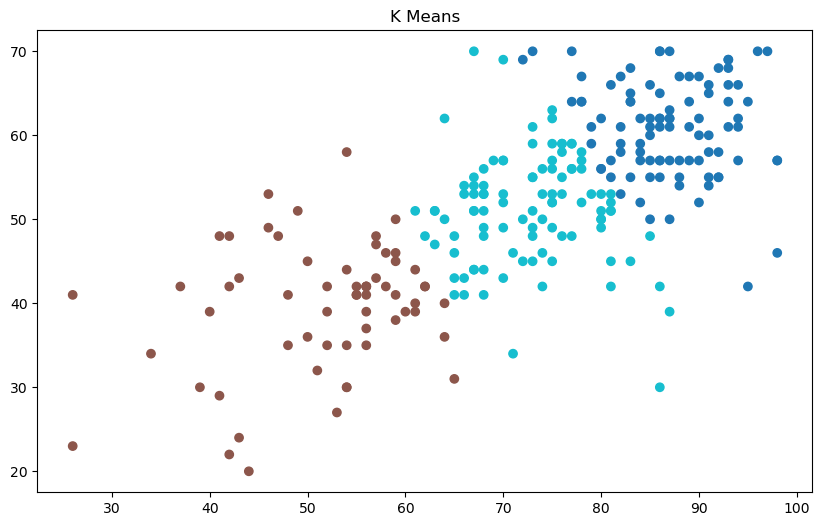

In [26]:
f, (ax1) = plt.subplots(1, figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(x=X['res'],y=X['well'],c=kmeans.labels_,cmap='tab10')


In [27]:
kmeans = KMeans( n_clusters = 2, init='k-means++')
y_pred= kmeans.fit_predict(X)

In [28]:
x = df.loc[:, ['res','well']].values 

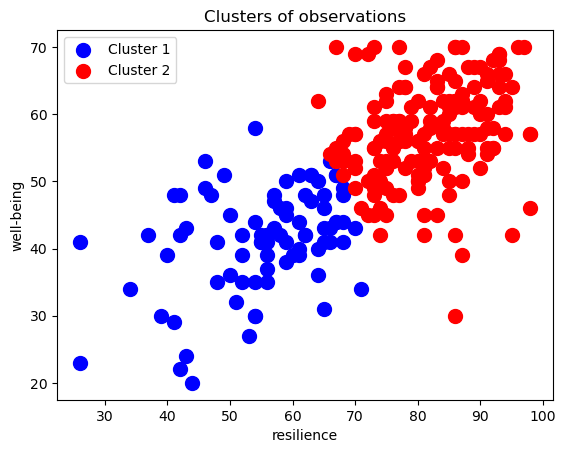

In [29]:
#visulaizing the clusters  
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'red', label = 'Cluster 2')  
#plt.scatter(x[y_pred== 2, 0], x[y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')  

plt.title('Clusters of observations')  
plt.xlabel('resilience')  
plt.ylabel('well-being')  
plt.legend()  
plt.show()  